<a href="https://colab.research.google.com/github/Saaia03/pr_1/blob/main/%D0%9B%D0%B0%D0%B1_2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
!pip install pandas scikit-learn seaborn scipy

In [115]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [116]:
# загружаем набор данных
df = pd.read_csv('/content/diamond.csv')
df

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171
...,...,...,...,...,...,...,...,...
5995,1.03,Ideal,D,SI1,EX,EX,GIA,6250
5996,1.00,Very Good,D,SI1,VG,VG,GIA,5328
5997,1.02,Ideal,D,SI1,EX,EX,GIA,6157
5998,1.27,Signature-Ideal,G,VS1,EX,EX,GIA,11206


In [117]:
# вывод всех колонок
for column in df.columns:
  print(f'колонка: {column}')

колонка: Carat Weight
колонка: Cut
колонка: Color
колонка: Clarity
колонка: Polish
колонка: Symmetry
колонка: Report
колонка: Price


In [118]:
# информация о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Carat Weight  6000 non-null   float64
 1   Cut           6000 non-null   object 
 2   Color         6000 non-null   object 
 3   Clarity       6000 non-null   object 
 4   Polish        6000 non-null   object 
 5   Symmetry      6000 non-null   object 
 6   Report        6000 non-null   object 
 7   Price         6000 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 375.1+ KB


In [119]:
# проверка на пропущенные значения
print(df.isnull().sum()) # пропусков нет

Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64


In [120]:
# генерируем случайную последовательность
np.random.seed(42)
df_test_nan = df.copy()
df_test_nan.loc[np.random.choice(df_test_nan.index, size=5, replace=True), 'Price'] = np.nan

In [121]:
# проверка на пропущенные значения
print(df_test_nan.isnull().sum()) # пропусков нет

Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           5
dtype: int64


In [122]:
# удаление строк с пропусками
df_drop = df_test_nan.dropna()
print("\n# Удаление строк с пропусками")
print(df.isnull().sum()) # пропусков нет


# Удаление строк с пропусками
Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64


In [123]:
df_drop

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169.0
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470.0
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183.0
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370.0
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171.0
...,...,...,...,...,...,...,...,...
5995,1.03,Ideal,D,SI1,EX,EX,GIA,6250.0
5996,1.00,Very Good,D,SI1,VG,VG,GIA,5328.0
5997,1.02,Ideal,D,SI1,EX,EX,GIA,6157.0
5998,1.27,Signature-Ideal,G,VS1,EX,EX,GIA,11206.0


In [124]:
# заполнение пропусков медианой
df_median = df_test_nan.copy()
df_median.a = df_median.Price.fillna(df_median.Price.median())

print("\n# Заполнение пропусков медианой")
print(df_median.isnull().sum()) # пропусков нет


# Заполнение пропусков медианой
Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           5
dtype: int64


<ipython-input-124-37760baa0930>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_median.a = df_median.Price.fillna(df_median.Price.median())


In [125]:
df_median

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169.0
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470.0
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183.0
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370.0
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171.0
...,...,...,...,...,...,...,...,...
5995,1.03,Ideal,D,SI1,EX,EX,GIA,6250.0
5996,1.00,Very Good,D,SI1,VG,VG,GIA,5328.0
5997,1.02,Ideal,D,SI1,EX,EX,GIA,6157.0
5998,1.27,Signature-Ideal,G,VS1,EX,EX,GIA,11206.0


In [126]:
# заполнение пропусков средним
df_mean = df_test_nan.copy()
df_mean.Price = df_mean.Price.fillna(df_mean.Price.mean())

print("\n# Заполнение пропусков средним")
print(df_mean.isnull().sum()) # пропусков нет


# Заполнение пропусков средним
Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64


In [127]:
df_mean

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169.0
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470.0
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183.0
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370.0
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171.0
...,...,...,...,...,...,...,...,...
5995,1.03,Ideal,D,SI1,EX,EX,GIA,6250.0
5996,1.00,Very Good,D,SI1,VG,VG,GIA,5328.0
5997,1.02,Ideal,D,SI1,EX,EX,GIA,6157.0
5998,1.27,Signature-Ideal,G,VS1,EX,EX,GIA,11206.0


In [128]:
# генерируем случайную последовательность
np.random.seed(42)
df_test_nan = df.copy()
df_test_nan.loc[np.random.choice(df_test_nan.index, size=5, replace=True), 'Price'] = np.nan

In [129]:
# Проверка на пропущенные значения
print(df_test_nan.isnull().sum()) # пропусков нет

Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           5
dtype: int64


In [130]:
df_mode = df_test_nan.copy()
df_mode['Price'] = df_mode['Price'].fillna(df_mode['Price'].mode()[0])
print("\n# Заполнение пропусков с помощью df.category_variable.mode()")
print(df_mode.isnull().sum()) # пропусков нет


# Заполнение пропусков с помощью df.category_variable.mode()
Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64


In [132]:
df_mode

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169.0
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470.0
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183.0
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370.0
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171.0
...,...,...,...,...,...,...,...,...
5995,1.03,Ideal,D,SI1,EX,EX,GIA,6250.0
5996,1.00,Very Good,D,SI1,VG,VG,GIA,5328.0
5997,1.02,Ideal,D,SI1,EX,EX,GIA,6157.0
5998,1.27,Signature-Ideal,G,VS1,EX,EX,GIA,11206.0


In [136]:
df['is_best_diamond'] = np.where(df['Cut'] == 'Ideal', 1, 0).astype(int)

In [137]:
df.columns

Index(['Carat Weight', 'Cut', 'Color', 'Clarity', 'Polish', 'Symmetry',
       'Report', 'Price', 'is_best_diamond'],
      dtype='object')

In [138]:
df

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,is_best_diamond
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169,1
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470,1
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183,1
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370,1
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171,1
...,...,...,...,...,...,...,...,...,...
5995,1.03,Ideal,D,SI1,EX,EX,GIA,6250,1
5996,1.00,Very Good,D,SI1,VG,VG,GIA,5328,0
5997,1.02,Ideal,D,SI1,EX,EX,GIA,6157,1
5998,1.27,Signature-Ideal,G,VS1,EX,EX,GIA,11206,0


In [139]:
Y = df['is_best_diamond'] # выбираем целевую переменную (категориальную)
X = df.drop('is_best_diamond', axis=1) # переменные для проверки влияния

# В моем случае я дропаю базовую переменную, а не только. Y
X = X.drop('Cut', axis=1)

In [140]:
# Список числовых колонок для построения графиков
numeric_cols = X.select_dtypes(include=['float64', 'int64'])
numeric_cols

,Carat Weight,Price
0,1.10,5169
1,0.83,3470
2,0.85,3183
3,0.91,4370
4,0.83,3171
...,...,...
5995,1.03,6250
5996,1.00,5328
5997,1.02,6157
5998,1.27,11206


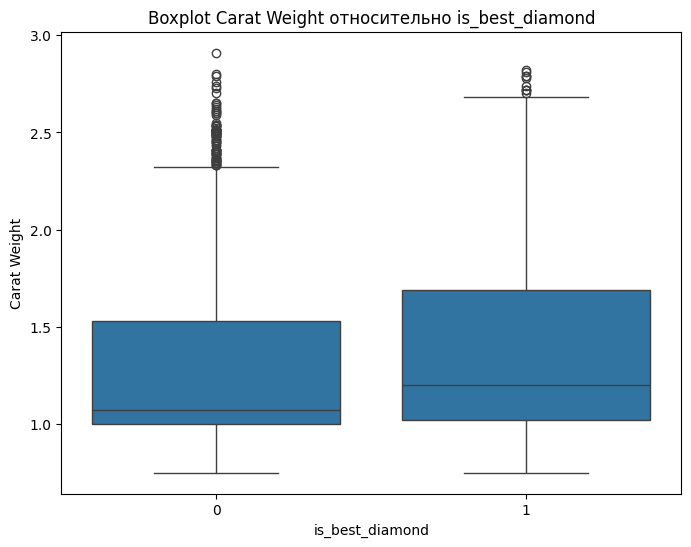

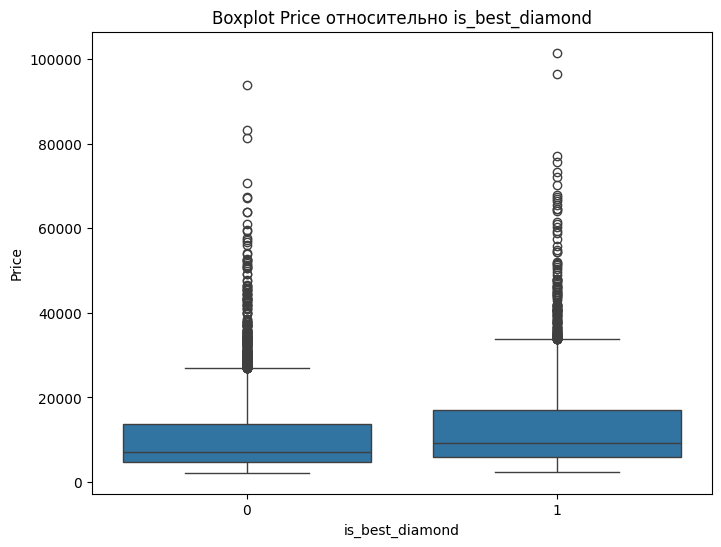

In [141]:
# Построение boxplot для каждой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='is_best_diamond', y=col, data=df)
    plt.title(f'Boxplot {col} относительно is_best_diamond')
    plt.show()

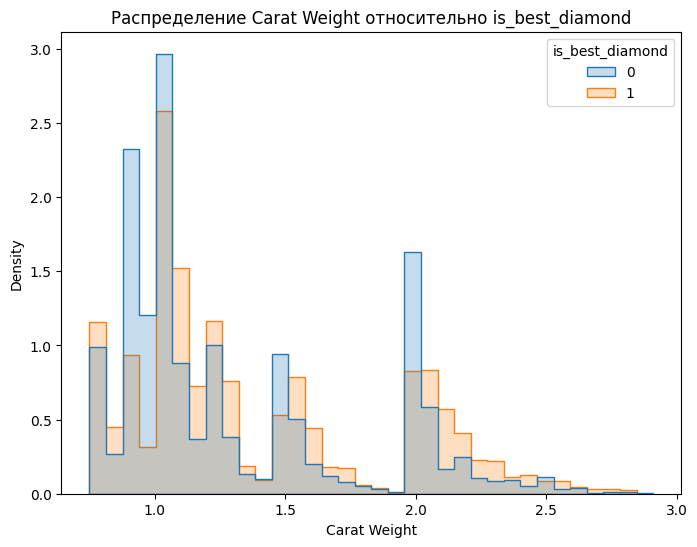

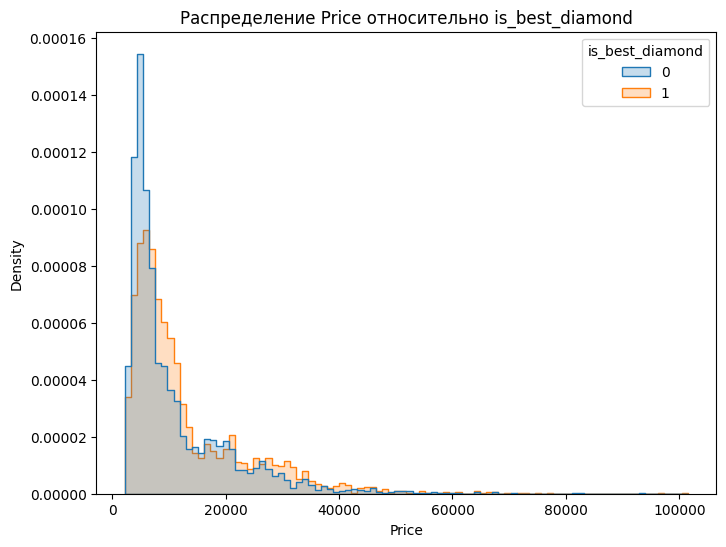

In [142]:
# Построение диаграмм распределения для каждой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, hue='is_best_diamond', element="step", stat="density", common_norm=False)
    plt.title(f'Распределение {col} относительно is_best_diamond')
    plt.show()

In [143]:
# Описательная статистика для числовых переменных, разделенная по целевой переменной
desc_stats_numeric = df.groupby('is_best_diamond')[df.select_dtypes(include=[np.number]).columns].describe()

# Описательная статистика для категориальных переменных, разделенная по целевой переменной
desc_stats_categorical = df.groupby('is_best_diamond')[df.select_dtypes(include=['object']).columns].describe()

In [144]:
# Проходим по каждой числовой переменной и выводим статистику отдельно
for col in numeric_cols:
    print(f"Описательная статистика для {col}:\n")
    print(df.groupby('is_best_diamond')[col].describe())
    print("\n" + "="*50 + "\n")

Описательная статистика для Carat Weight:

                  count      mean       std   min   25%   50%   75%   max
is_best_diamond                                                          
0                3518.0  1.300816  0.463145  0.75  1.00  1.07  1.53  2.91
1                2482.0  1.382293  0.489068  0.75  1.02  1.20  1.69  2.82


Описательная статистика для Price:

                  count          mean           std     min     25%     50%  \
is_best_diamond                                                               
0                3518.0  10849.187038   9419.785263  2184.0  4802.0  6961.5   
1                2482.0  13127.331185  11043.822620  2383.0  5861.5  9143.0   

                      75%       max  
is_best_diamond                      
0                13618.75   93813.0  
1                16988.00  101561.0  




In [66]:
print("\nКатегориальные переменные:")
desc_stats_categorical


Категориальные переменные:


Cut                     Color                  Clarity         \
            count unique    top  freq count unique top  freq   count unique   
extra_white                                                                   
0            5339      5  Ideal  2202  5339      5   G  1501    5339      6   
1             661      5  Ideal   280   661      1   D   661     661      7   

             ... Polish       Symmetry                  Report              \
             ...    top  freq    count unique top  freq  count unique  top   
extra_white  ...                                                             
0            ...     EX  2157     5339      4  VG  2161   5339      2  GIA   
1            ...     VG   285      661      4  VG   256    661      2  GIA   

                   
             freq  
extra_white        
0            4653  
1             613  

[2 rows x 24 columns]

In [67]:
df[df.select_dtypes(include=[np.number]).columns].corr()

,Carat Weight,Price,extra_white
Carat Weight,1.000000,0.858562,-0.051522
Price,0.858562,1.000000,0.119695
extra_white,-0.051522,0.119695,1.000000


In [145]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [146]:
# Выбираем категориальные признаки
categorical_features = X.select_dtypes(include=['object', 'int64']).columns.tolist()

print("Категориальные признаки:", categorical_features)

Категориальные признаки: ['Color', 'Clarity', 'Polish', 'Symmetry', 'Report', 'Price']


In [147]:
# Создаем копию данных
X_processed = X.copy()

# Применяем One-Hot Encoding
X_processed = pd.get_dummies(X_processed, columns=categorical_features, drop_first=True) # drop_first=True позволяет избежать мультиколлинеарности, удаляя первый уровень категориальной переменной.

In [149]:
X_processed

,Carat Weight,Color_E,Color_F,Color_G,Color_H,Color_I,Clarity_IF,Clarity_SI1,Clarity_VS1,Clarity_VS2,...,Price_70683,Price_72195,Price_73209,Price_75630,Price_77033,Price_81399,Price_83145,Price_93813,Price_96493,Price_101561
0,1.10,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.83,False,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,0.85,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.91,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.83,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1.03,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
5996,1.00,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
5997,1.02,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
5998,1.27,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [150]:
# Выбираем числовые признаки
numeric_features = X_processed.select_dtypes(include=['float64']).columns.tolist()

print("Числовые признаки:", numeric_features)

Числовые признаки: ['Carat Weight']


In [151]:
# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X_processed[numeric_features] = scaler.fit_transform(X_processed[numeric_features])

In [152]:
X_processed

,Carat Weight,Color_E,Color_F,Color_G,Color_H,Color_I,Clarity_IF,Clarity_SI1,Clarity_VS1,Clarity_VS2,...,Price_70683,Price_72195,Price_73209,Price_75630,Price_77033,Price_81399,Price_83145,Price_93813,Price_96493,Price_101561
0,0.162037,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.037037,False,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,0.046296,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.074074,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.037037,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.129630,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
5996,0.115741,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
5997,0.125000,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
5998,0.240741,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [153]:
def train_and_evaluate(X, Y):
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42, stratify=Y)

    # Инициализация модели
    model = LogisticRegression(max_iter=1000)

    # Обучение модели
    model.fit(X_train, Y_train)

    # Предсказания на обучающей выборке
    Y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)

    # Предсказания на тестовой выборке
    Y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)

    # Вывод результатов
    print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
    print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

    # Классификационный отчет
    print("\nКлассификационный отчет на тестовой выборке:")
    print(classification_report(Y_test, Y_test_pred))

    return model

In [154]:
# Обучение модели
model = train_and_evaluate(X_processed, Y)

Точность на обучающей выборке: 0.8202
Точность на тестовой выборке: 0.7225

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       704
           1       0.66      0.69      0.67       496

    accuracy                           0.72      1200
   macro avg       0.71      0.72      0.72      1200
weighted avg       0.72      0.72      0.72      1200



In [155]:
# Получение коэффициентов модели
coefficients = pd.DataFrame({
    'Feature': X_processed.columns,
    'Coefficient': model.coef_[0]
})

# Сортировка по абсолютному значению коэффициента
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

print(coefficients[['Feature', 'Coefficient']])

          Feature  Coefficient
15     Symmetry_G    -2.669410
18     Report_GIA     1.965162
2188   Price_8093    -1.432224
12       Polish_G    -1.294616
2560   Price_9533     1.291661
...           ...          ...
734    Price_4519     0.000000
2788  Price_10537     0.000000
730    Price_4514     0.000000
2784  Price_10519     0.000000
2293   Price_8470     0.000000

[4839 rows x 2 columns]


In [156]:
from sklearn.model_selection import cross_val_score

# Кросс-валидация с 5 фолдами
scores = cross_val_score(model, X_processed, Y, cv=5, scoring='accuracy')

print(f"Средняя точность при кросс-валидации: {scores.mean():.4f}")
print(f"Отклонение точности: {scores.std():.4f}")

Средняя точность при кросс-валидации: 0.7133
Отклонение точности: 0.0101


In [157]:
X_train, X_test, Y_train, Y_test = train_test_split(X_processed, Y, test_size=0.2, random_state=42, stratify=Y)

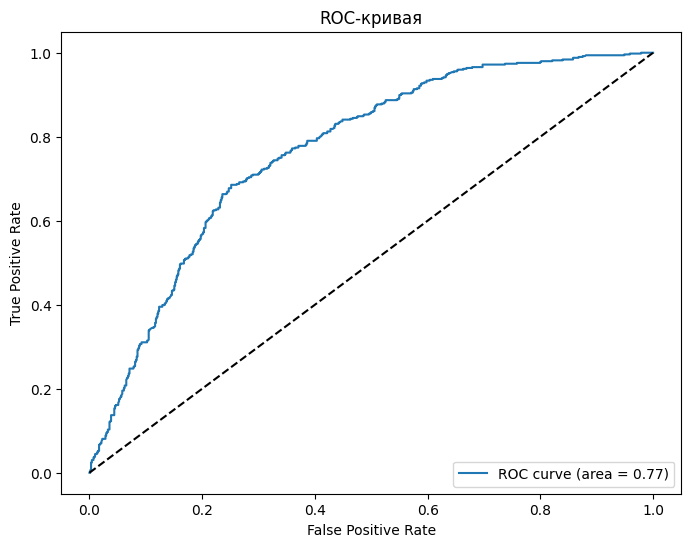

In [158]:
from sklearn.metrics import roc_curve, auc

# Предсказания вероятностей для тестовой выборки
Y_test_prob = model.predict_proba(X_test)[:, 1]

# Расчет ROC-кривой
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_prob)
roc_auc = auc(fpr, tpr)

# Построение графика
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()